
* dataset: Eval1.0
* url: https://github.com/esantus/EVALution/blob/master/EVALution_1.0/RELATIONS.txt 

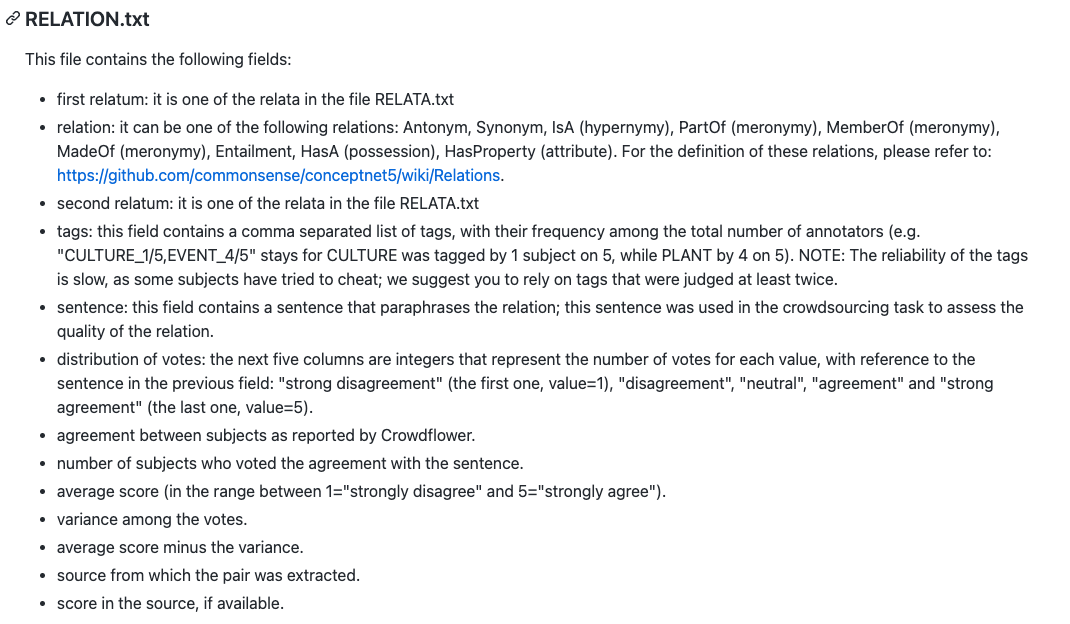

In [2]:
import pandas as pd 
import json 
import copy
import re 
from collections import Counter, defaultdict

pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',500)


# Read relata

In [3]:

pos_mapping={"j": 'ADJ', 'v': 'VERB', 'n': 'NOUN'}

def load_data_relata(orig_path = '../data/EVAL1.0/RELATA.txt'):
    '''
    read the original dataset and return dataframe 
    
    POS: 'term-dominatPOS' 
    forms: 'distribution-forms', e..g, absolute_95/Absolute_3/absolutes_1	
    POS-count: distribution-POS
    '''

    columns = ['relatum', 'tags', 'frequency', 'POS', 'POS_count_broad:', 'forms', 'POS_count_fine']
    examples = []
    with open(orig_path, 'r') as fin:
        lines = fin.readlines()
        for line in lines:
            line_list = line.strip().split("\t")
            example = dict(zip(columns, line_list))
#             print(example['term-dominatPOS'].split('-'))
            example['POS'] = pos_mapping.get(example['POS'].split("-")[-1], 'UNK')
            example['forms'] = list(set([x.split('_')[0].lower() for x in example['forms'].split('/')]))
            example['frequency'] = int(example['frequency'])

            examples.append(example)
    df = pd.DataFrame(examples)
    realtion_sets = set(df["POS"])
    print(Counter(df["POS"]).most_common())
    return df 

df_relata = load_data_relata(orig_path = '../data/EVAL1.0/RELATA.txt')
# df_ = df.query("relation == 'IsA'")
df_relata.head()


[('NOUN', 1111), ('VERB', 343), ('ADJ', 234), ('UNK', 141)]


,relatum,tags,frequency,POS,POS_count_braod:,forms,POS_count_fine
0,absolute,"SPECIFIC_1/2,CONCRETE_1/2,GENERAL_1/2",69877,ADJ,JJ_98/NN_1,"[absolute, absolutes]",JJ_98/NNS_1
1,abstract,"SUPERORDINATE_1/2,ABSTRACT_2/2,GENERAL_2/2,OTHER_1/2,SUBORDINATE_1/2,EVENT_1/2",92663,ADJ,JJ_68/NN_27/VV_4,"[abstracts, abstract, abstracted, abstracting]",JJ_68/NNS_20/NN_7/VVN_1/VVG_1
2,accident,"SUPERORDINATE_1/2,CONCRETE_1/2,EVENT_2/2,GENERAL_1/2",159563,NOUN,NN_99,"[accident, accidents]",NN_69/NNS_30
3,account,"SUPERORDINATE_2/2,ABSTRACT_2/2,OTHER_2/2,GENERAL_2/2",600523,NOUN,NN_87/VV_12,"[accounted, account, accounting, accounts]",NN_61/NNS_25/VV_3/VVP_2/VVZ_2/VVD_1/VVN_1/VVG_1
4,act,"SUPERORDINATE_4/26,PLANT_1/26,COLOR_1/26,SPACE_1/26,FOOD_1/26,PEOPLE_1/26,ABSTRACT_12/26,TIME_1/26,OBJECT_1/26,GENERAL_9/26,SPECIFIC_8/26,CONCRETE_5/26,OTHER_8/26,ANIMAL_1/26,BASIC_7/26,SUBORDINATE_4/26,EVENT_18/26",614927,VERB,VV_56/NN_43,"[act, acting, acted, acts]",NN_26/VVG_18/VV_18/NNS_16/VVZ_6/VVD_5/VVN_4/VVP_3


# Read relations

In [23]:
def load_data_relations(orig_path = '../data/EVAL1.0/relations.txt'):
    '''
    read the original dataset and return dataframe 
    '''

    columns = ['sub_label', 'relation', 'obj_label', 'tags', 'sentence', 'strong_disagreement', 'disagreement', 'neutral', 'agree', 'strong_agreement', 'subj_agreement', 'num_subj', 'avg_score', 'vote_variance', 'avg_score_minue_variance','source', 'score_source' ]
    examples = []
    with open(orig_path, 'r') as fin:
        lines = fin.readlines()
        for line in lines:
            line_list = line.strip().split("\t")
#             print(len(line_list))
#             print(len(columns))
            example = dict(zip(columns, line_list))
            examples.append(example)
    #         break
    df = pd.DataFrame(examples)
    realtion_sets = set(df.relation)
    print(df.relation.value_counts())
    return df 


df = load_data_relations(orig_path = '../data/EVAL1.0/RELATIONS.txt')
df = df.query("relation == 'IsA'")
df = df.query("obj_label !='reproduction'")


IsA            1880
Antonym        1600
HasProperty    1297
Synonym        1086
PartOf          654
HasA            544
MadeOf          317
Entails          82
MemberOf         32
Name: relation, dtype: int64


wordnet/4.0         819
conceptnet/4/en     497
dbpedia/en          199
umbel               159
globalmind           90
wordnet/3.0          89
wiktionary/de/en     16
wiktionary/en/en     11
Name: source, dtype: int64

,sub_label,relation,obj_label,tags,sentence,strong_disagreement,disagreement,neutral,agree,strong_agreement,subj_agreement,num_subj,avg_score,vote_variance,avg_score_minue_variance,source,score_source
4,accident,IsA,error,"EVENT_4/5,RELATIONSHIP_1/5",accident is a kind of error,0,0,0,2,3,0.9116,5,4.6,0.3,4.3,conceptnet/4/en,1.5849625007211563
5,accident,IsA,happen,EVENT_5/5,accident is a kind of happen,0,0,0,2,3,0.965458333334,5,4.6,0.3,4.3,wordnet/3.0,1.5849625007211563
6,accident,IsA,mistake,"RELATIONSHIP_1/60,NATURE_1/60,FOOD_1/60,COMMUNICATION_2/60,OBJECT_3/60,CULTURE_2/60,EVENT_57/60",accident is a kind of mistake,0,0,0,2,3,0.954483333333,5,4.6,0.3,4.3,conceptnet/4/en,1.5849625007211563
11,account,IsA,pay,"BUSINESS_1/5,RELATIONSHIP_1/5,NATURE_1/5,COMMUNICATION_1/5,EVENT_3/5",account is a kind of pay,0,1,0,3,1,0.948633333333,5,3.8,1.2,2.6,conceptnet/4/en,1.5849625007211563
17,act,IsA,art,"CULTURE_2/3,EVENT_1/3",Act is a kind of art,0,0,0,5,0,0.95324,5,4.0,0.0,4.0,conceptnet/4/en,1.5849625007211563


<AxesSubplot:ylabel='Frequency'>

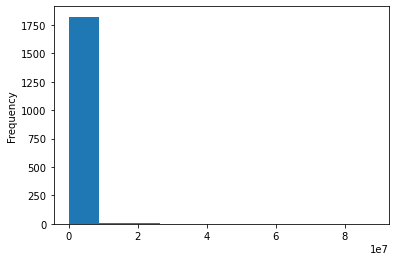

In [37]:
display(df['source'].value_counts())
display(df.head())
display(df_relata['frequency'].plot(kind='hist'))

# Get NOUN-NOUN Hyernym/IsA relation data

In [44]:
def get_noun_noun_pairs(df, relata_to_dominate_pos):
    df['sub_pos'] = df['sub_label'].apply(lambda x: relata_to_dominate_pos.get(x))
    df['obj_pos'] = df['obj_label'].apply(lambda x: relata_to_dominate_pos.get(x))
    return df.query("sub_pos=='NOUN' and obj_pos=='NOUN'")

def get_freq(df, relata_to_frequnecy):
    df['sub_freq'] = df['sub_label'].apply(lambda x: relata_to_frequnecy.get(x))
    df['obj_freq'] = df['obj_label'].apply(lambda x: relata_to_frequnecy.get(x))
    return df 

#`link_relati`ns_relata(df, dfr):
relata_to_dominate_pos = dict(zip(df_relata['relatum'], df_relata['POS']))
relata_to_frequnecy = dict(zip(df_relata['relatum'], df_relata['frequency']))

df_hyper = df.query("relation == 'IsA'")

print(f"#Hypo-Hyper pairs: {len(df_hyper.index)}")
df_hyper = get_noun_noun_pairs(df_hyper, relata_to_dominate_pos)
df_hyper = get_freq(df_hyper, relata_to_frequnecy)
df_hyper['label'] = ['True'] * len(df_hyper.index)
print(f"# NOUN-NOUN Hypo-Hyper pairs: {len(df_hyper.index)}")

# df['sub_label_relata'] = df['sub_label'].apply(lambda x: df_relata.loc[df_relata["relatum"]==f'{x}'][['frequency', 'POS', 'forms']].to_dict(orient='records')[0])
# df['obj_label_relata'] = df['obj_label'].apply(lambda x: df_relata.loc[df_relata["relatum"]==f'{x}'][['frequency', 'POS', 'forms']].to_dict(orient='records')[0])

# set(df['obj_label']) - set(df_relata['relatum'])
output_path = '../data/hypernymysuite/data/eval.tsv'
df_hyper = df_hyper.rename(columns={"sub_label": 'word1', 'obj_label': 'word2', 
                                    'relation': 'hyper', 'label': 'label', 'fold': 'test'})

display(df_hyper.head())
df_hyper.to_csv(output_path, sep='\t', index=False)
print(f"save {output_path}")

#Hypo-Hyper pairs: 1880
# NOUN-NOUN Hypo-Hyper pairs: 957


,word1,hyper,word2,tags,sentence,strong_disagreement,disagreement,neutral,agree,strong_agreement,subj_agreement,num_subj,avg_score,vote_variance,avg_score_minue_variance,source,score_source,sub_pos,obj_pos,sub_freq,obj_freq,label
4,accident,IsA,error,"EVENT_4/5,RELATIONSHIP_1/5",accident is a kind of error,0,0,0,2,3,0.9116,5,4.6,0.3,4.3,conceptnet/4/en,1.5849625007211563,NOUN,NOUN,159563,195525,True
6,accident,IsA,mistake,"RELATIONSHIP_1/60,NATURE_1/60,FOOD_1/60,COMMUNICATION_2/60,OBJECT_3/60,CULTURE_2/60,EVENT_57/60",accident is a kind of mistake,0,0,0,2,3,0.954483333333,5,4.6,0.3,4.3,conceptnet/4/en,1.5849625007211563,NOUN,NOUN,159563,108097,True
36,action,IsA,event,EVENT_5/5,action is a kind of event,0,0,0,1,4,0.982075,5,4.8,0.2,4.6,umbel,1.0,NOUN,NOUN,741010,1221712,True
38,action,IsA,work,"EMOTION_1/5,CULTURE_1/5,BUSINESS_1/5,RELATIONSHIP_1/5,NATURE_1/5,FOOD_1/5,COMMUNICATION_1/5,OBJECT_1/5,COLOR_1/5,SPACE_1/5,TIME_1/5,EVENT_5/5",action is a kind of work,0,0,0,3,2,0.91888,5,4.4,0.3,4.1,wordnet/4.0,score,NOUN,NOUN,741010,4889622,True
45,actor,IsA,person,"RELATIONSHIP_2/5,BUSINESS_1/5,NATURE_2/5,TIME_1/5,CULTURE_2/5,EVENT_1/5",actor is a kind of person,0,0,0,0,5,0.92868,5,5.0,0.0,5.0,dbpedia/en,2.700439718141092,NOUN,NOUN,183205,786200,True


save ../data/hypernymysuite/data/eval.tsv


In [93]:
pos_sub = Counter([x['POS'] for x in df['sub_label_relata']])
pos_obj = Counter([x['POS'] for x in df['obj_label_relata']])

pos_sub_obj = Counter([(x['POS'], y['POS']) for x,y in zip(df['sub_label_relata'], df['obj_label_relata'])])
for index, row in df.iterrows():
#     print(index, 
    if row['sub_label_relata']['POS']=='NOUN' and row['obj_label_relata']['POS'] == 'VERB':
      print(row['sub_label'], row['obj_label'])
# print(pos_sub)
# print(pos_obj)

# print(pos_sub_obj)
# df[['sub_label', 'sub_label_relata', 'obj_label', 'obj_label_relata']].head(10)


accident happen
account pay
action act
action play
advance increase
advance move
affection feel
age develop
anger feel
apartment build
approach come
arch bend
arch build
arch open
art play
author write
bar support
barbecue cook
bark talk
bark tan
bat hit
battle fight
beef meet
birth begin
boat ride
bolt lock
bowl play
box hit
bridge build
brush move
carpet cover
case cover
castle build
cement fasten
chain fasten
chair sit
change dress
church build
clip attach
club hit
club meet
club stick
coach drive
coach teach
coat cover
comfort support
content satisfy
copy write
costume dress
court build
courthouse build
creation begin
crime act
crop cut
crust cover
cube build
dance move
death kill
den build
desert leave
disgust dislike
dive fall
document confirm
document write
dream hope
drink use
duck move
ear hear
emotion feel
emotion think
end happen
exit move
exit open
eye look
feather cover
fence play
fire bake
fire burn
flight fly
flow move
form make
frame construct
frost freeze
game play
gar